In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced


In [17]:
# Loading and preprocessing Data

In [18]:
# Loading data
file_path = Path("../apestogetherstrong/logistic_regression_test.csv")
df_equities = pd.read_csv(file_path)
df_equities.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,Medical Specialties,Health Technology,8/20/2020,318382,1651518,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,Aluminum,Non-Energy Minerals,8/20/2020,1543881,5460701,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,151621,584100,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,Miscellaneous Commercial Services,Commercial Services,8/20/2020,10963,36708,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,177,1191,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [19]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   industry                                      623468 non-null  object 
 3   sector                                        623468 non-null  object 
 4   date                                          623468 non-null  object 
 5   volume                                        623468 non-null  int64  
 6   volume_previousday                            623468 non-null  int64  
 7   volume_greater_previousday                    623468 non-null  int64  
 8   volume_deathIncrease_up                       623468 non-null  int64  
 9   volume_hospitalizedIncrease_up                62

In [20]:
#rf_df = pd.DataFrame().assign(symbol=df_equities['symbol'],date=df_equities['date'],high=df_equities['high'],iexClose=df_equities['iexClose'],deathIncrease=df_equities['deathIncrease'],negativeIncrease=df_equities['negativeIncrease'],positiveIncrease=df_equities['positiveIncrease'],totalTestResultsIncrease=df_equities['totalTestResultsIncrease'],volume_hospitalizedIncrease_up=df_equities['volume_hospitalizedIncrease_up'])
#print(rf_df)

In [21]:
float or np.ndarray(dtype=float)
df_equities['date'] = pd.to_datetime(df_equities['date'])    
df_equities['date_delta'] = (df_equities['date'] - df_equities['date'].min())  / np.timedelta64(1,'D')
# converting to object
df_equities = df_equities.astype({"date":'int64'}) 

In [22]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 45 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   industry                                      623468 non-null  object 
 3   sector                                        623468 non-null  object 
 4   date                                          623468 non-null  int64  
 5   volume                                        623468 non-null  int64  
 6   volume_previousday                            623468 non-null  int64  
 7   volume_greater_previousday                    623468 non-null  int64  
 8   volume_deathIncrease_up                       623468 non-null  int64  
 9   volume_hospitalizedIncrease_up                62

In [23]:
df_equities = df_equities.drop(labels=["symbol", "date", "industry", "sector"], axis=1)
df_equities.head()



,data_index,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,volume_totalTestResultsIncrease_up,high,...,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday,date_delta
0,0,318382,1651518,0,0,0,0,0,0,98.150,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
1,1,1543881,5460701,0,0,0,0,0,0,15.120,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
2,2,151621,584100,0,0,0,0,0,0,19.440,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
3,3,10963,36708,0,0,0,0,0,0,1.126,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
4,4,177,1191,0,0,0,0,0,0,56.330,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0


In [24]:
df_equities.tail()

,data_index,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,volume_totalTestResultsIncrease_up,high,...,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday,date_delta
623463,623463,195564,132125,1,1,1,1,1,1,4.270,...,304962,268046,1,224526,193008,1,1791481,1770133,1,125.0
623464,623464,217828,227603,0,0,0,0,0,0,53.700,...,304962,268046,1,224526,193008,1,1791481,1770133,1,125.0
623465,623465,1062396,1019326,1,1,1,1,1,1,3.505,...,304962,268046,1,224526,193008,1,1791481,1770133,1,125.0
623466,623466,402081,352613,1,1,1,1,1,1,14.490,...,304962,268046,1,224526,193008,1,1791481,1770133,1,125.0
623467,623467,403929,1643700,0,0,0,0,0,0,4.610,...,304962,268046,1,224526,193008,1,1791481,1770133,1,125.0


In [25]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 41 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   volume                                        623468 non-null  int64  
 2   volume_previousday                            623468 non-null  int64  
 3   volume_greater_previousday                    623468 non-null  int64  
 4   volume_deathIncrease_up                       623468 non-null  int64  
 5   volume_hospitalizedIncrease_up                623468 non-null  int64  
 6   volume_negativeIncrease_up                    623468 non-null  int64  
 7   volume_positiveIncrease_up                    623468 non-null  int64  
 8   volume_totalTestResultsIncrease_up            623468 non-null  int64  
 9   high                                          62

In [26]:
# Create our features
#X = pd.get_dummies(df_equities, columns=["death", "deathIncrease", "hospitalizedIncrease", "hospitalizedCurrently", "negative", "positive", "totalTestResults", "totalTestResultsIncrease"])
X = df_equities.drop('volume_hospitalizedIncrease_up',axis=1)
# Create our target
y = pd.DataFrame(df_equities["volume_hospitalizedIncrease_up"])
X.head()

,data_index,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,volume_totalTestResultsIncrease_up,high,high_previousday,...,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday,date_delta
0,0,318382,1651518,0,0,0,0,0,98.150,99.403,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
1,1,1543881,5460701,0,0,0,0,0,15.120,15.945,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
2,2,151621,584100,0,0,0,0,0,19.440,19.880,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
3,3,10963,36708,0,0,0,0,0,1.126,1.210,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0
4,4,177,1191,0,0,0,0,0,56.330,57.580,...,208472,243232,0,43844,45073,0,864210,832115,1,0.0


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 40 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   volume                                        623468 non-null  int64  
 2   volume_previousday                            623468 non-null  int64  
 3   volume_greater_previousday                    623468 non-null  int64  
 4   volume_deathIncrease_up                       623468 non-null  int64  
 5   volume_negativeIncrease_up                    623468 non-null  int64  
 6   volume_positiveIncrease_up                    623468 non-null  int64  
 7   volume_totalTestResultsIncrease_up            623468 non-null  int64  
 8   high                                          623468 non-null  float64
 9   high_previousday                              62

In [28]:
X.describe()

,data_index,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_negativeIncrease_up,volume_positiveIncrease_up,volume_totalTestResultsIncrease_up,high,high_previousday,...,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday,date_delta
count,623468.000000,6.234680e+05,6.234680e+05,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,...,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,6.234680e+05,6.234680e+05,623468.000000,623468.000000
mean,311733.500000,9.020192e+05,8.906700e+05,0.497981,0.281341,0.283386,0.356297,0.321450,41.163351,41.089596,...,250270.392405,249489.000000,0.531646,100151.316456,97879.759494,0.708861,1.282244e+06,1.270100e+06,0.670886,62.164557
std,179979.853153,6.620270e+06,6.394659e+06,0.499996,0.449654,0.450642,0.478905,0.467034,103.949506,103.847350,...,124994.255672,124842.770939,0.498998,68173.329913,66970.381771,0.454288,4.011269e+05,4.000468e+05,0.469892,35.269849
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-658774.000000,-658774.000000,0.000000,22310.000000,22310.000000,0.000000,5.468590e+05,5.468590e+05,0.000000,0.000000
25%,155866.750000,1.108300e+04,1.096300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,7.580000,7.565000,...,211097.000000,211097.000000,0.000000,43642.000000,43642.000000,0.000000,9.504830e+05,9.375750e+05,0.000000,33.000000
50%,311733.500000,8.173400e+04,8.083450e+04,0.000000,0.000000,0.000000,0.000000,0.000000,21.680000,21.640000,...,263255.000000,258394.000000,1.000000,63430.000000,62856.000000,1.000000,1.182695e+06,1.156284e+06,1.000000,61.000000
75%,467600.250000,4.126640e+05,4.077580e+05,1.000000,1.000000,1.000000,1.000000,1.000000,42.739250,42.650000,...,304962.000000,304853.000000,1.000000,166503.000000,159826.000000,1.000000,1.653269e+06,1.634272e+06,1.000000,91.000000
max,623467.000000,1.864680e+09,1.864680e+09,1.000000,1.000000,1.000000,1.000000,1.000000,4530.000000,4530.000000,...,456078.000000,456078.000000,1.000000,236933.000000,236933.000000,1.000000,2.010951e+06,2.010951e+06,1.000000,125.000000


In [29]:
# Check the balance of our target values
y['volume_hospitalizedIncrease_up'].value_counts()

0    482585
1    140883
Name: volume_hospitalizedIncrease_up, dtype: int64

In [30]:
y.head()

,volume_hospitalizedIncrease_up
0,0
1,0
2,0
3,0
4,0


In [31]:
# Check the balance of our target values
y['volume_hospitalizedIncrease_up'].value_counts(normalize=True)

0    0.774033
1    0.225967
Name: volume_hospitalizedIncrease_up, dtype: float64

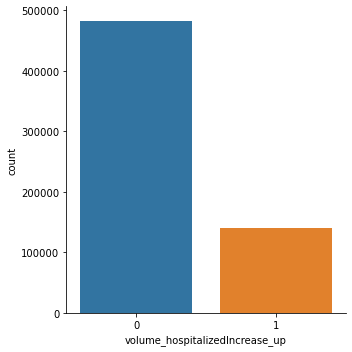

In [32]:
import seaborn as sn
sn.factorplot('volume_hospitalizedIncrease_up', data=y,kind='count')

In [33]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [34]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
# Create a random forest classifier.
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [35]:
# Fitting the model
predictions = brf_model.predict(X_test)
balanced_accuracy_score(y_test, predictions)

1.0

In [36]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[120646,      0],
       [     0,  35221]], dtype=int64)

In [37]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    120646
          1       1.00      1.00      1.00      1.00      1.00      1.00     35221

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    155867



In [38]:
# Calculate feature importance in the Random Forest model.
importances = brf_model.feature_importances_
importances

array([1.34521914e-02, 7.51924742e-04, 8.40724447e-04, 1.47932692e-01,
       8.52367836e-02, 2.50206563e-02, 2.31175807e-01, 4.32773621e-02,
       2.69099632e-04, 2.28965523e-04, 6.49222200e-03, 6.00765072e-03,
       2.88040443e-02, 4.04002601e-03, 4.50886706e-03, 1.41955927e-03,
       1.84697747e-04, 1.97084753e-04, 9.21777895e-04, 8.43603332e-04,
       6.07785890e-03, 1.30406123e-03, 2.85066162e-03, 1.79492660e-03,
       1.66910067e-02, 1.40874223e-02, 7.08038315e-03, 2.25486201e-02,
       2.23427796e-02, 1.98053084e-01, 1.39794009e-02, 9.94005790e-03,
       2.78906244e-03, 8.15344711e-03, 1.27555556e-02, 2.26616489e-02,
       1.15191799e-02, 8.43187295e-03, 4.98875190e-03, 1.03444783e-02])

In [39]:
# Sort the features by their importance.
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.2311758072084679, 'volume_positiveIncrease_up'),
 (0.1980530842822161, 'hospitalizedIncrease_greater_previousday'),
 (0.14793269163469913, 'volume_greater_previousday'),
 (0.08523678363002636, 'volume_deathIncrease_up'),
 (0.043277362108063, 'volume_totalTestResultsIncrease_up'),
 (0.02880404428126601, 'high_hospitalizedIncrease_up'),
 (0.02502065628760077, 'volume_negativeIncrease_up'),
 (0.022661648924417986, 'positiveIncrease_greater_previousday'),
 (0.022548620107820664, 'hospitalizedIncrease'),
 (0.02234277955178651, 'hospitalizedIncrease_previousday'),
 (0.016691006680293167, 'deathIncrease'),
 (0.014087422280714192, 'deathIncrease_previousday'),
 (0.013979400890498565, 'negativeIncrease'),
 (0.013452191417159587, 'data_index'),
 (0.012755555623416168, 'positiveIncrease_previousday'),
 (0.011519179860734793, 'totalTestResultsIncrease'),
 (0.010344478310897898, 'date_delta'),
 (0.009940057903313518, 'negativeIncrease_previousday'),
 (0.008431872945856478, 'totalTestResultsIncr

In [40]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    120646
          1       1.00      1.00      1.00      1.00      1.00      1.00     35221

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    155867



In [41]:
r_probs = [0 for _ in range(len(y_test))]
brf_model_probs = brf_model.predict_proba(X_test)


In [42]:
brf_model_probs = brf_model_probs[:, 1]


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score


In [44]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, brf_model_probs)

In [45]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, brf_model_probs)

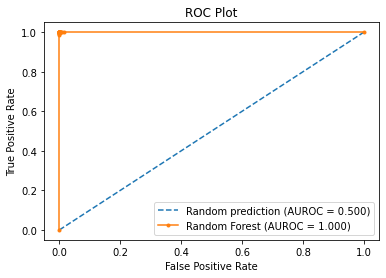

In [46]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()